<a href="https://colab.research.google.com/github/Sai030703/Fault-Analysis-with-Neural-Networks/blob/main/Neural_network_Fault_analysis_TES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 6.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [ ]:
df_fault_free = pyreadr.read_r("/content/drive/MyDrive/Colab Notebooks/DIGITAL TWIN/TEP/TEP_FaultFree_Training.RData")['fault_free_training']
df_faulty = pyreadr.read_r("/content/drive/MyDrive/Colab Notebooks/DIGITAL TWIN/TEP/TEP_Faulty_Training.RData")['faulty_training']

In [ ]:
df = pd.concat([df_fault_free, df_faulty])
df.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5250000 entries, 0 to 4999999
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   faultNumber    float64
 1   simulationRun  float64
 2   sample         int32  
 3   xmeas_1        float64
 4   xmeas_2        float64
 5   xmeas_3        float64
 6   xmeas_4        float64
 7   xmeas_5        float64
 8   xmeas_6        float64
 9   xmeas_7        float64
 10  xmeas_8        float64
 11  xmeas_9        float64
 12  xmeas_10       float64
 13  xmeas_11       float64
 14  xmeas_12       float64
 15  xmeas_13       float64
 16  xmeas_14       float64
 17  xmeas_15       float64
 18  xmeas_16       float64
 19  xmeas_17       float64
 20  xmeas_18       float64
 21  xmeas_19       float64
 22  xmeas_20       float64
 23  xmeas_21       float64
 24  xmeas_22       float64
 25  xmeas_23       float64
 26  xmeas_24       float64
 27  xmeas_25       float64
 28  xmeas_26       float64
 29  xmeas_27       floa

### EXPLORATORY DATA ANALYSIS


In [ ]:
#summary statistics for each column

summary= df[df['simulationRun']==1].iloc[:,3:].describe()
print(summary)

NameError: name 'df' is not defined

### Fault classification using neural networks

In [ ]:
df.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [ ]:
summary = df[df['simulationRun']==1].iloc[:,3:].describe()
print(summary)

            xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       0.265576   3661.241419   4505.710048      9.348456     26.904955   
std        0.143596     41.840258    103.764946      0.299329      0.235383   
min       -0.003183   3470.900000   3884.300000      7.494400     25.592000   
25%        0.225830   3636.800000   4473.000000      9.269300     26.764000   
50%        0.251195   3661.250000   4506.700000      9.352200     26.897000   
75%        0.282177   3686.500000   4545.600000      9.442225     27.056000   
max        1.005200   3820.200000   5013.300000     11.157000     28.077000   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      42.352988   2716.501076     74.965782    120.400574      0.346336   
std        0.290591     68.489751      1.200865    

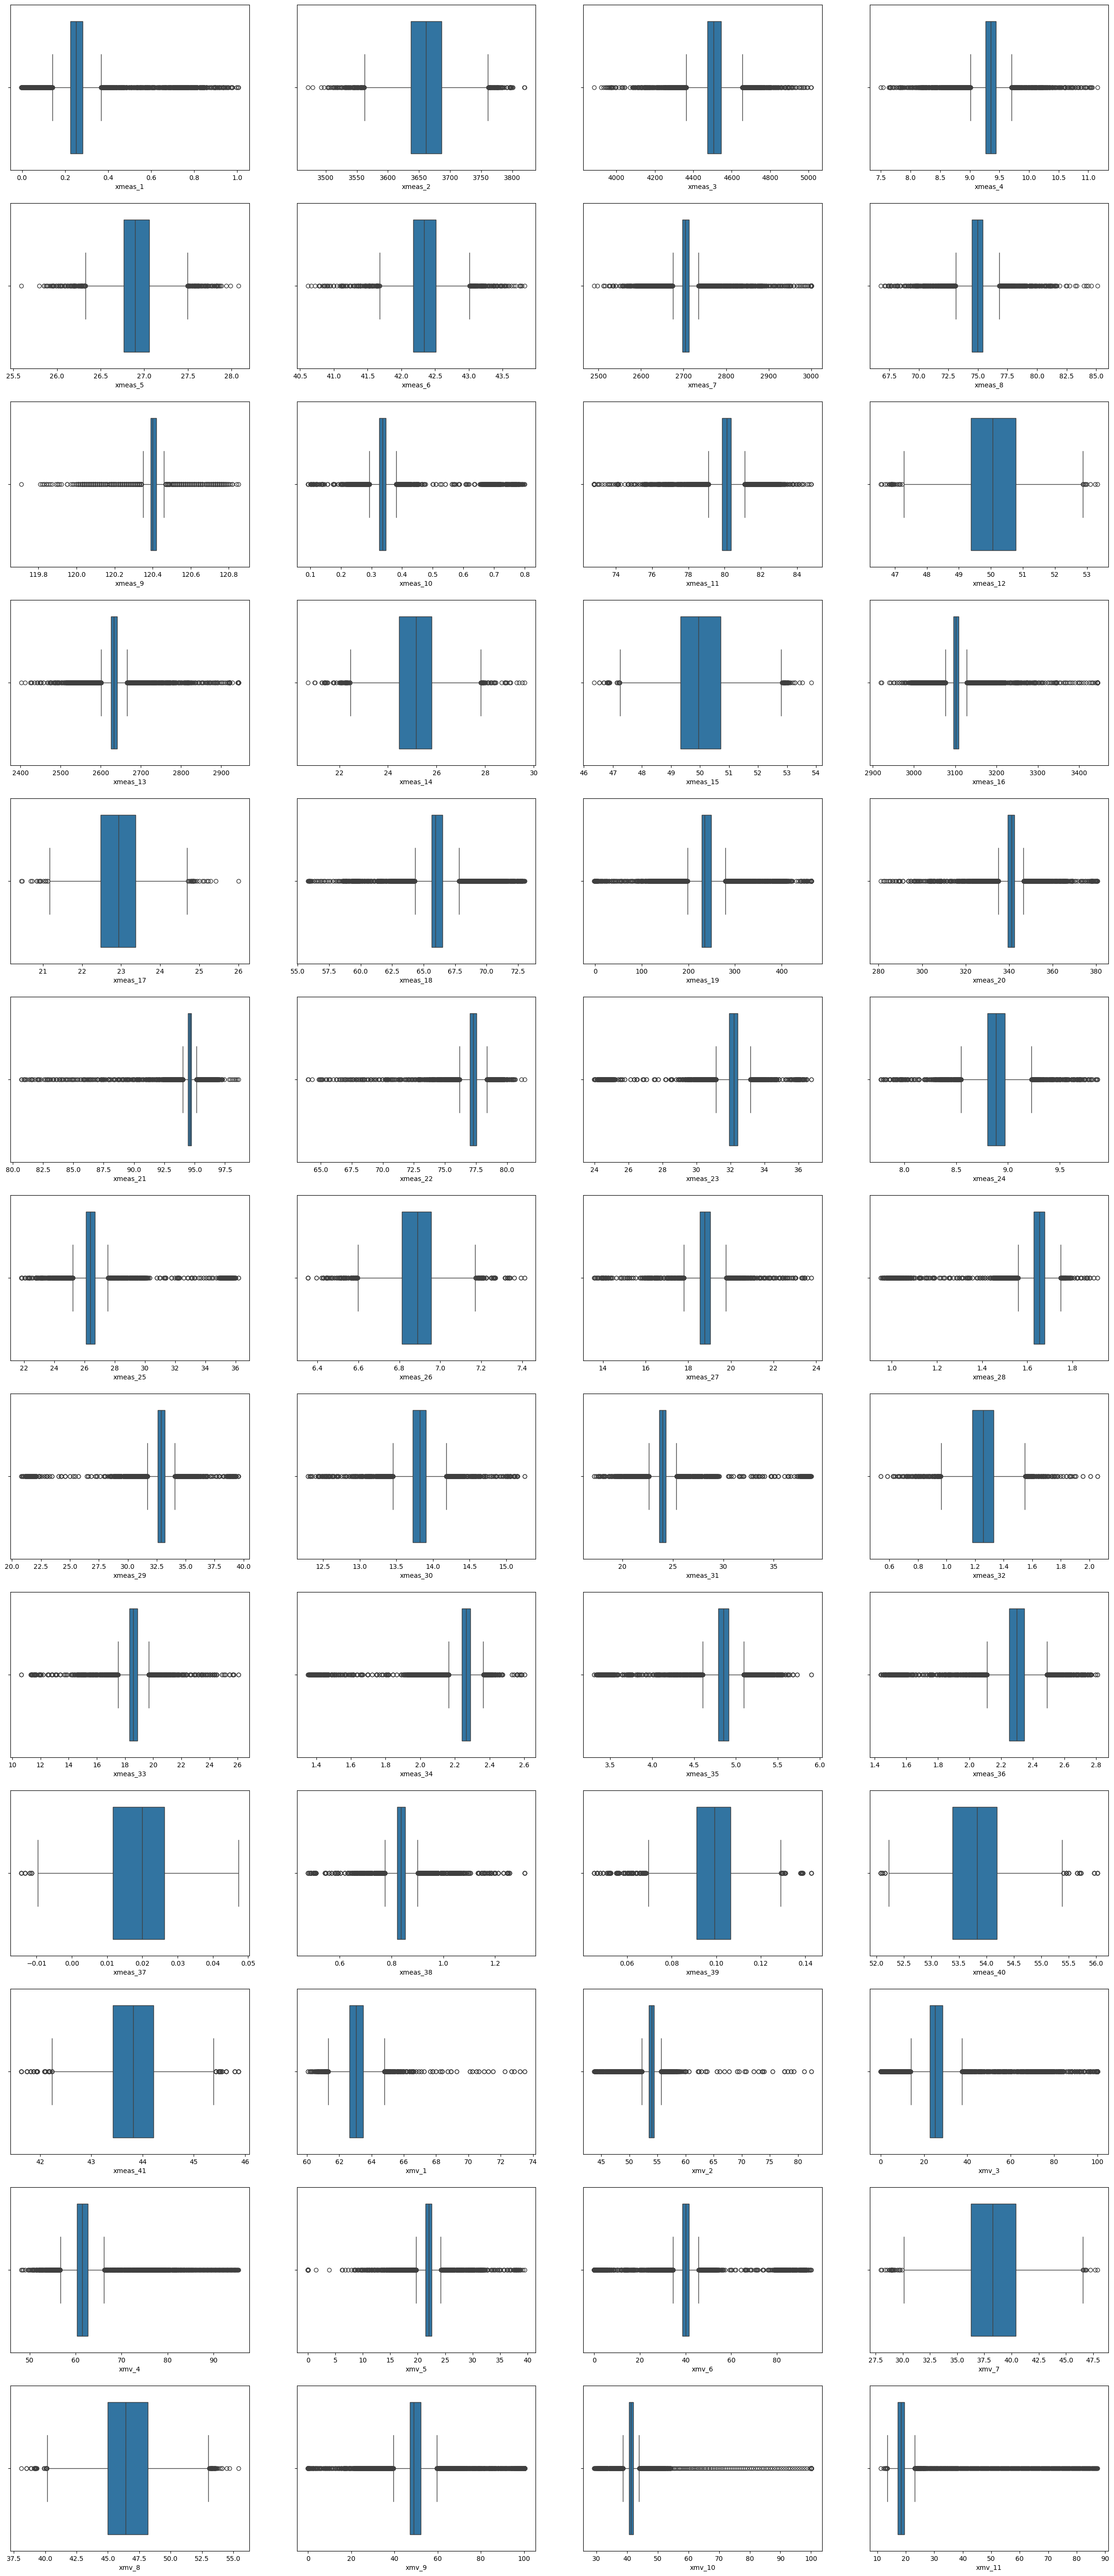

In [ ]:
#creating a box plot for each variable

data = df[df['simulationRun']==1]

fig,ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):
  sns.boxplot(data=data,x=column,ax=ax.ravel()[i])

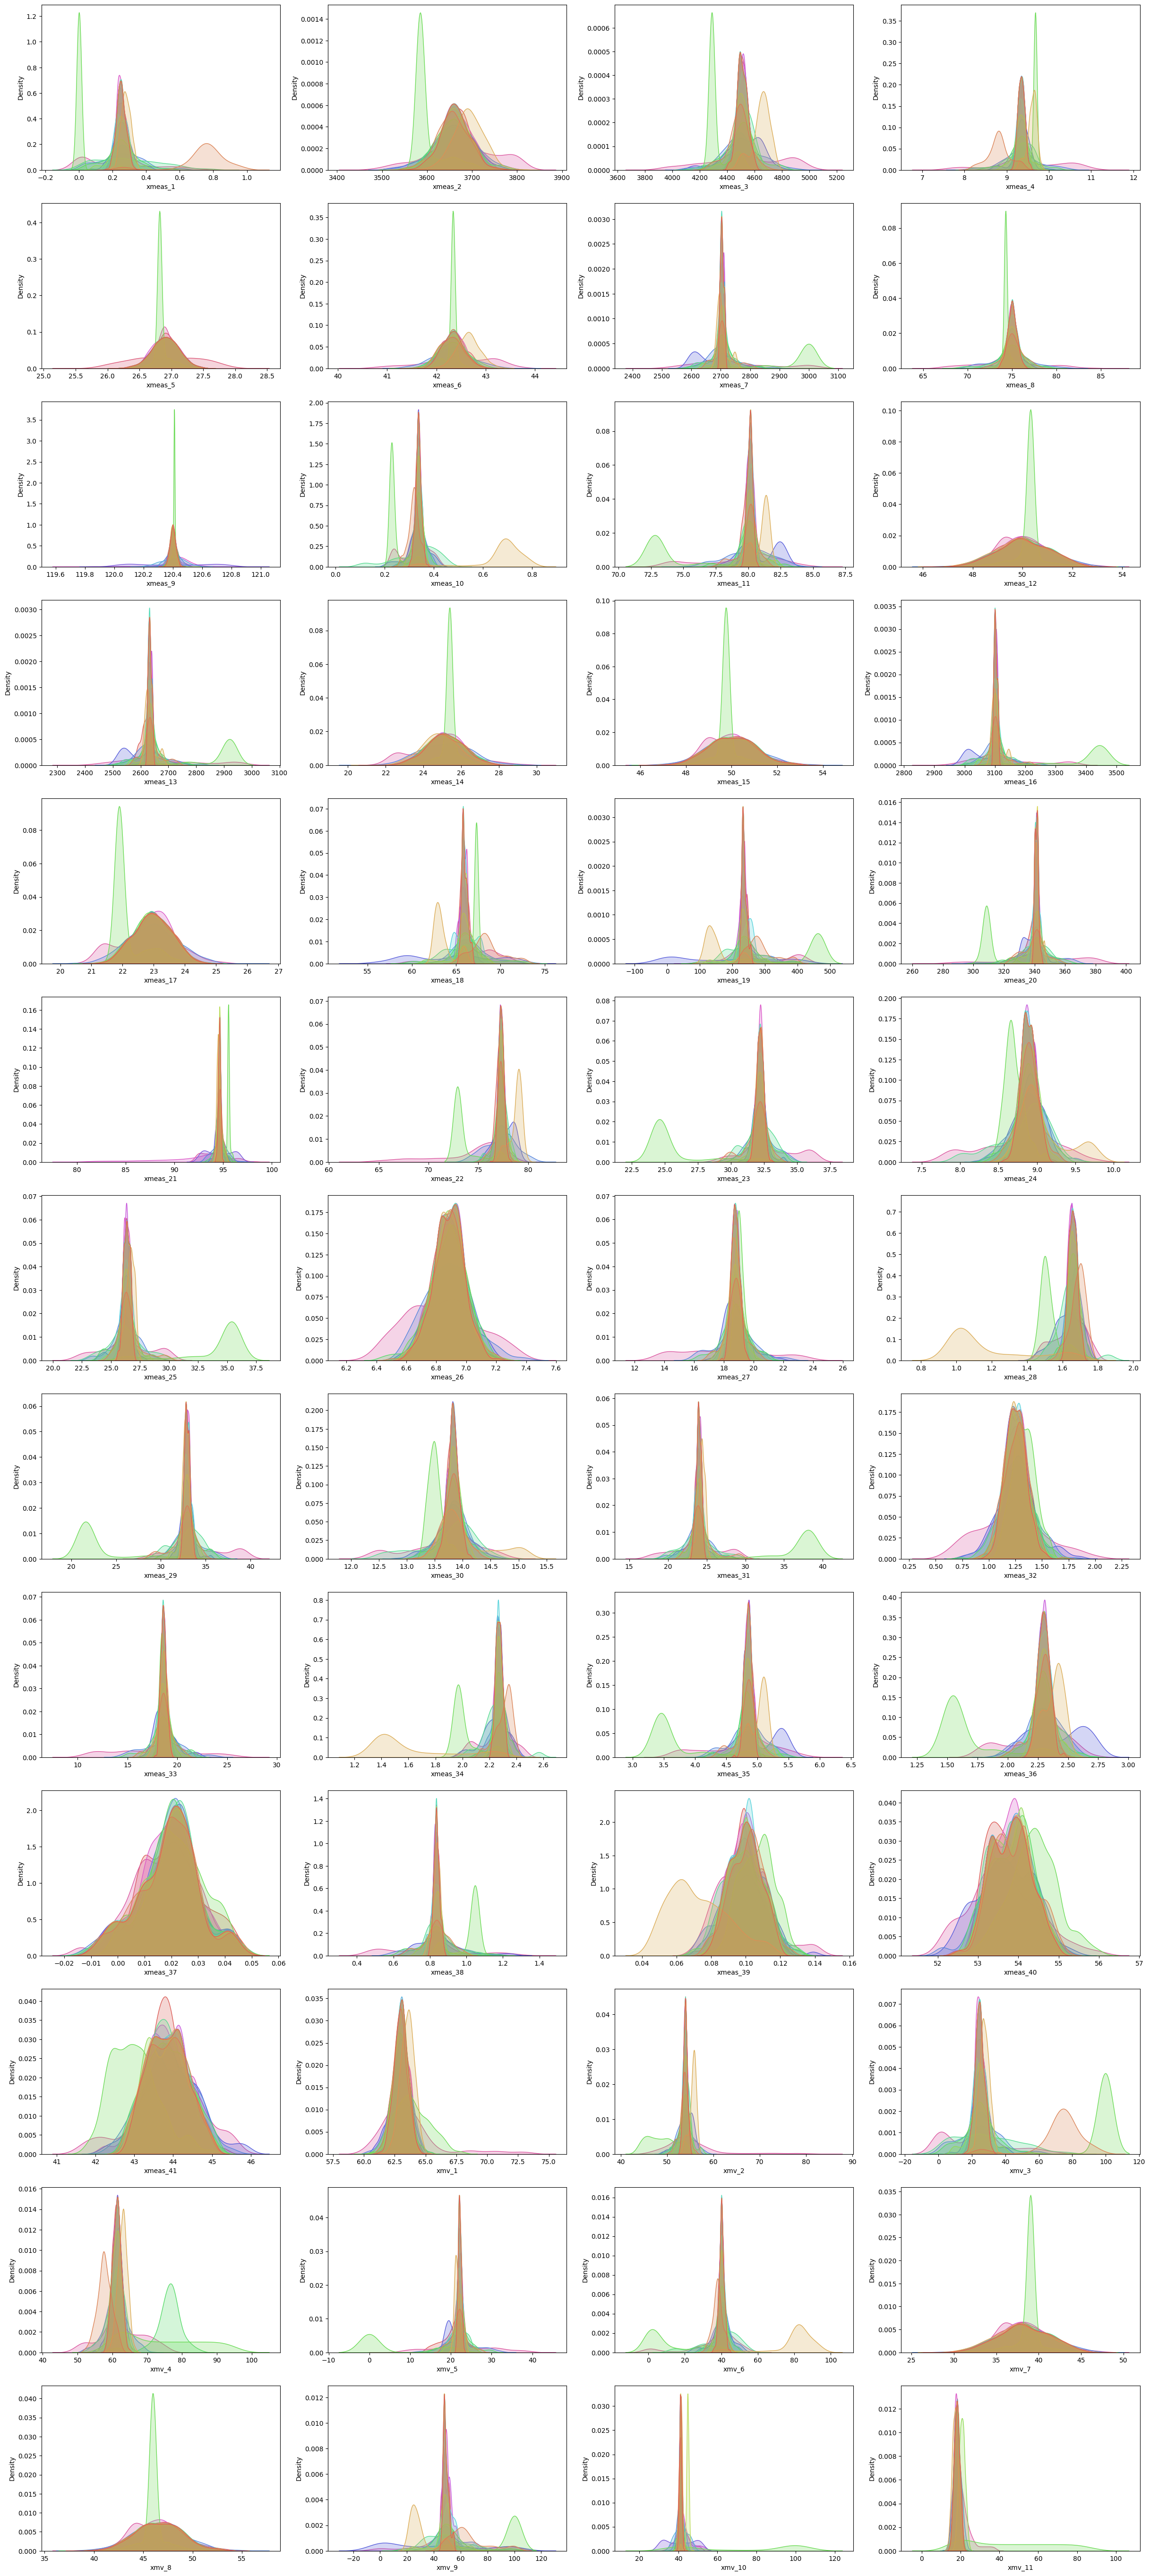

In [ ]:
#KDE plot or kennel density estimation plot

fig,ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):
  sns.kdeplot(data = data,x=column,hue='faultNumber',palette='hls',ax=ax.ravel()[i],fill=True,legend=False)

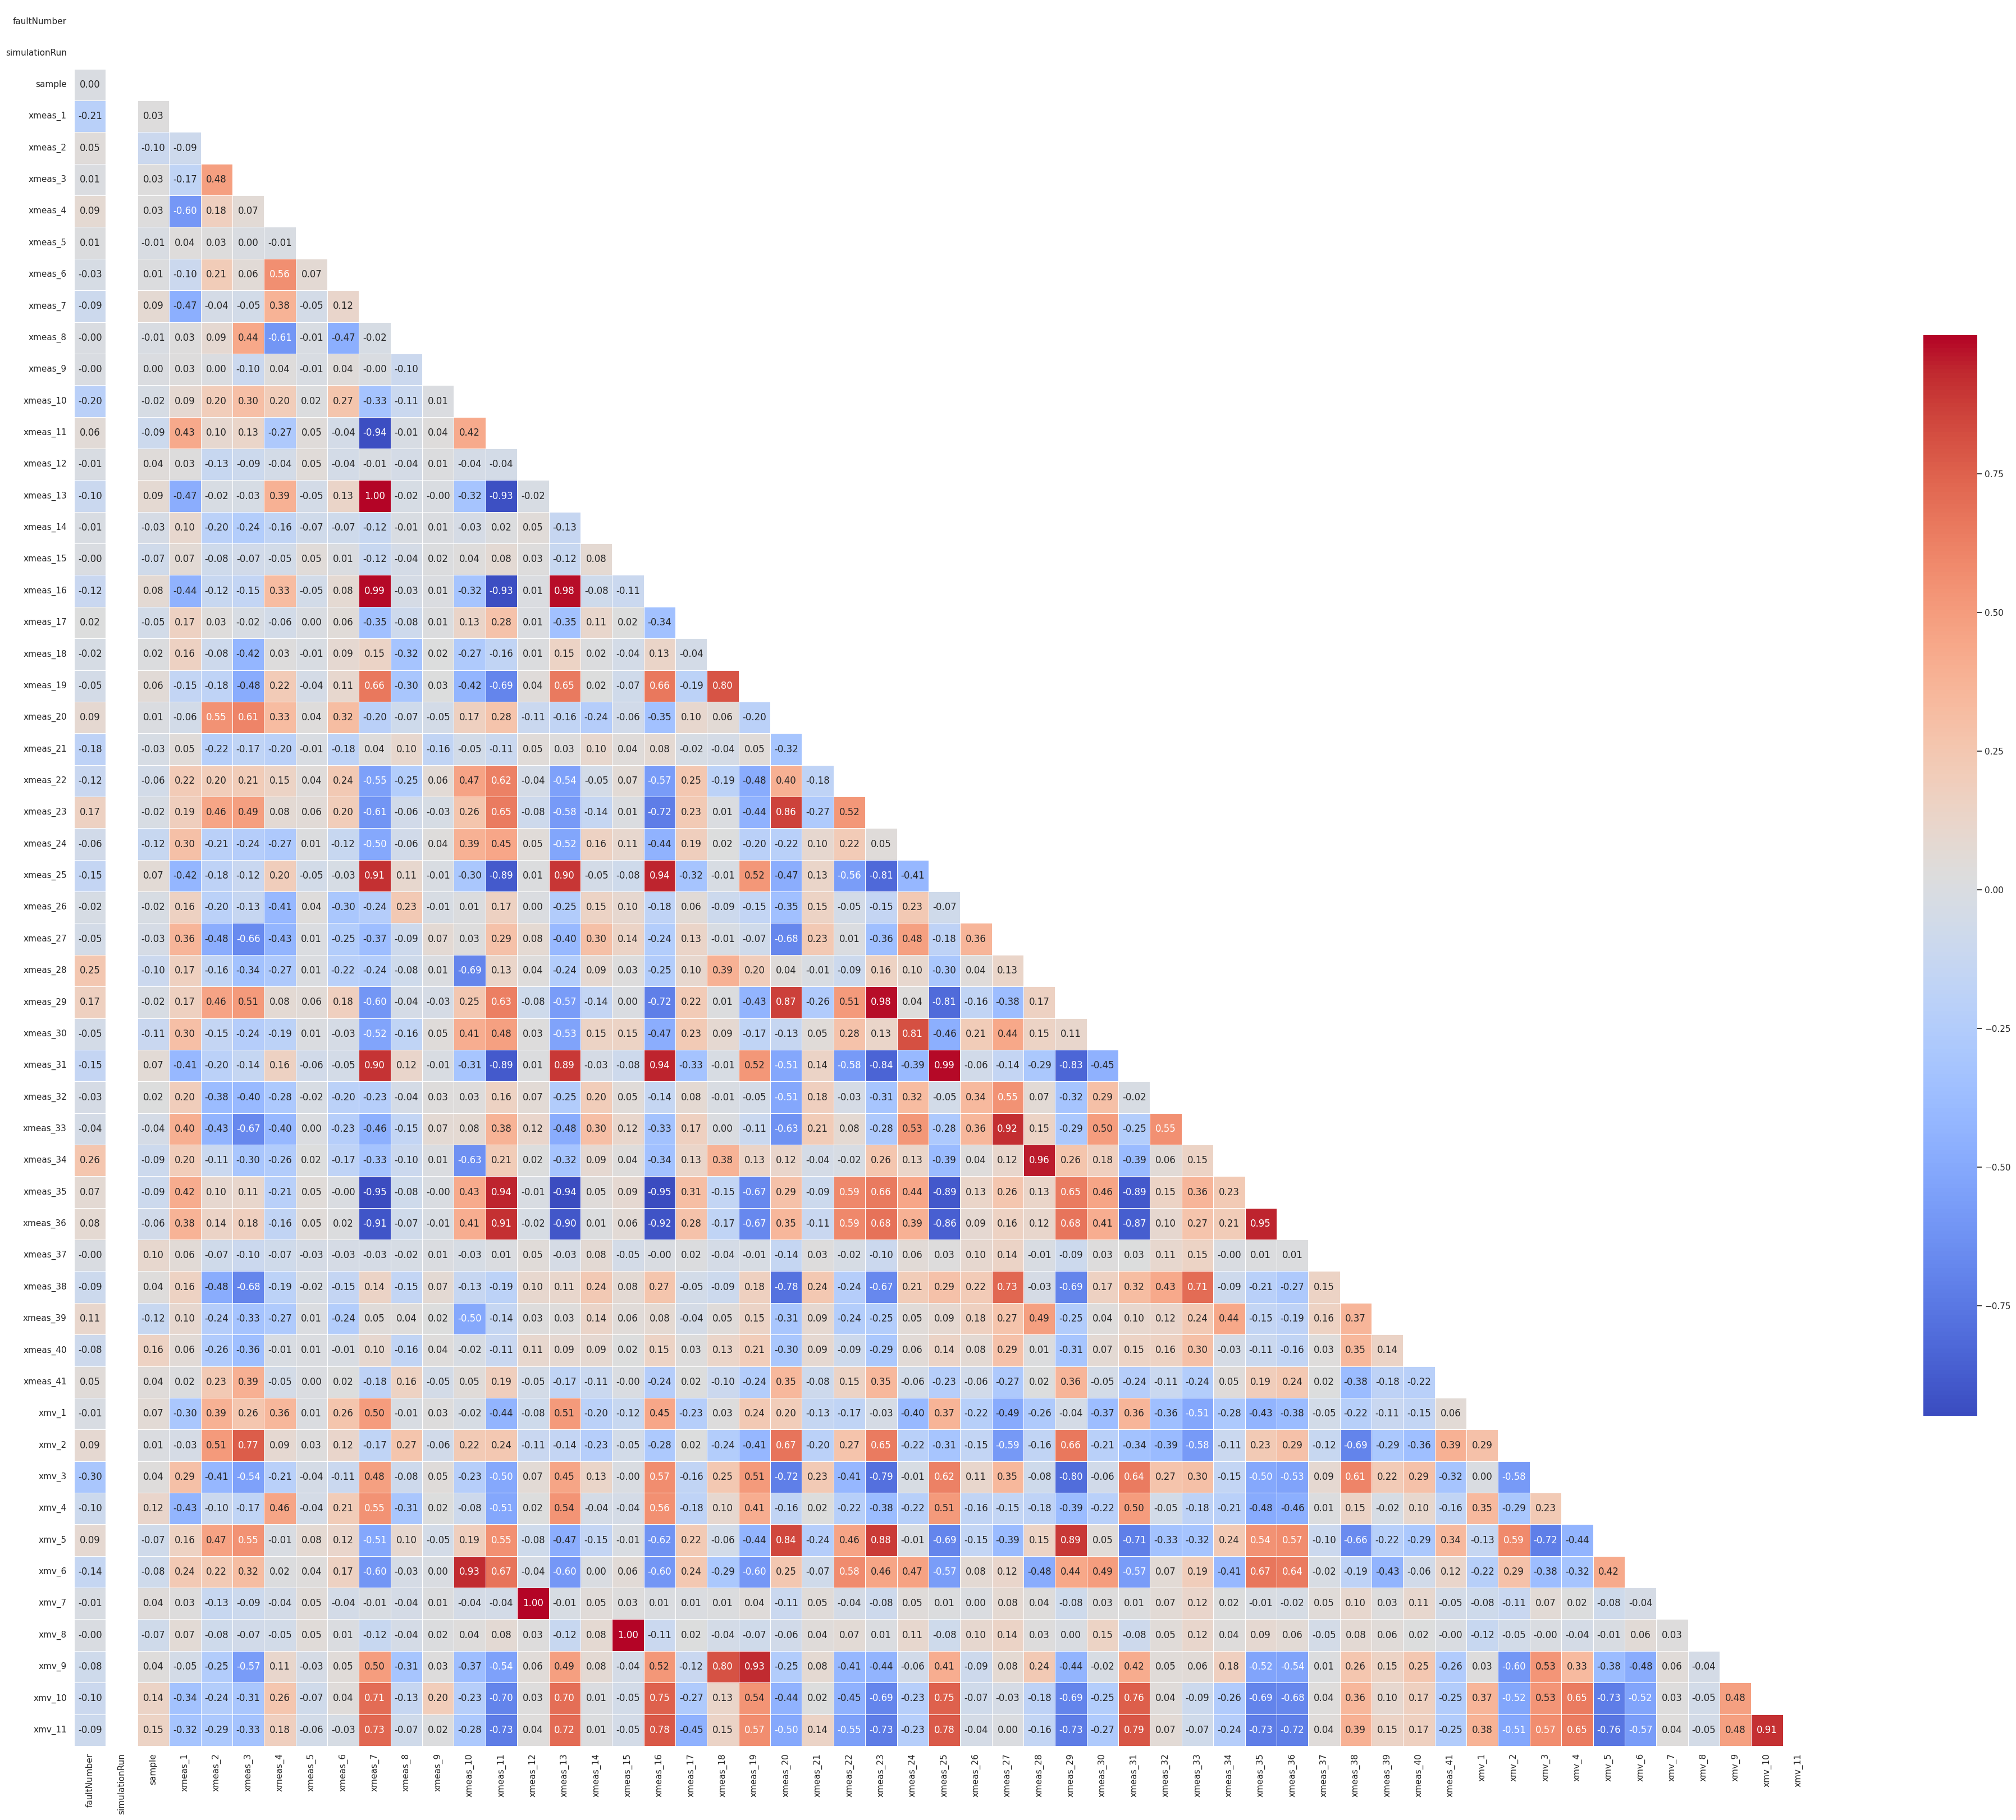

In [ ]:
#correlation matrix

corr = data.corr()

#creating heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr,mask=mask,cmap='coolwarm',annot=True,fmt='.2f',square=True,linewidths=.5,cbar_kws={'shrink':.5})
plt.show()

In [ ]:
#calculate correlation matrrix

corr_matrix = df.iloc[:,3:].corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

print(len(to_drop))
print(to_drop)

12
['xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8']


### Drop the correlated features

In [ ]:
data = df[(df['simulationRun'] == 4)]
reduced_data = data.drop(columns=to_drop,axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
1500           0.0            4.0       1  0.25117   3641.2   4499.7   9.3640   
1501           0.0            4.0       2  0.24957   3652.0   4491.8   9.3392   
1502           0.0            4.0       3  0.24942   3665.6   4514.1   9.3934   
1503           0.0            4.0       4  0.25156   3659.6   4493.5   9.1898   
1504           0.0            4.0       5  0.30868   3679.7   4521.3   9.5622   
...            ...            ...     ...      ...      ...      ...      ...   
39995         20.0            4.0     496  0.27470   3723.2   4567.9   9.3020   
39996         20.0            4.0     497  0.21871   3678.9   4571.4   9.2438   
39997         20.0            4.0     498  0.21758   3660.6   4557.0   9.3881   
39998         20.0            4.0     499  0.22549   3673.3   4547.5   9.3404   
39999         20.0            4.0     500  0.22649   3656.3   4515.3   9.1973   

       xmeas_5  xmeas_6  xmeas_7  ...  xmeas_40  xmeas_41   xmv_1   xmv_2  \
1500    26.893   42.359   2705.3  ...    53.724    43.828  63.446  54.095   
1501    26.804   42.441   2704.8  ...    53.724    43.828  63.259  54.190   
1502    26.533   42.053   2704.4  ...    53.724    43.828  63.025  53.922   
1503    26.828   42.495   2703.6  ...    53.724    43.828  63.128  54.168   
1504    26.862   42.378   2705.1  ...    53.724    43.828  63.390  54.058   
...        ...      ...      ...  ...       ...       ...     ...     ...   
39995   26.517   42.536   2721.8  ...    53.431    43.461  63.705  54.337   
39996   26.820   42.005   2720.3  ...    53.431    43.461  63.124  54.213   
39997   26.676   42.443   2716.8  ...    53.431    43.461  63.440  54.385   
39998   27.019   42.599   2717.9  ...    53.431    43.461  63.126  54.451   
39999   27.005   42.411   2716.5  ...    53.431    43.461  63.417  54.837   

        xmv_3   xmv_4   xmv_5   xmv_9  xmv_10  xmv_11  
1500   24.581  60.751  22.261  47.457  41.910  18.766  
1501   24.737  61.585  22.153  47.332  40.196  19.880  
1502   24.759  61.729  22.200  47.612  41.744  17.879  
1503   24.549  60.539  22.505  47.478  41.129  16.033  
1504   30.396  59.515  22.146  47.526  40.942  20.172  
...       ...     ...     ...     ...     ...     ...  
39995  26.975  62.505  21.052  48.829  42.194  19.600  
39996  21.423  60.565  21.235  48.456  41.728  18.774  
39997  21.534  60.861  20.585  48.127  41.100  19.396  
39998  22.272  60.715  20.895  47.778  41.116  19.053  
39999  22.173  61.905  20.510  47.412  41.686  19.293  

[9000 rows x 43 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()

sc.fit(reduced_data.iloc[:,3:])

MinMaxScaler()

In [ ]:
data = df.loc[(df['simulationRun'] >= 1) & (df['simulationRun'] <= 50)]
reduced_data = data.drop(columns=to_drop,axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

# reduced_data = reduced_data.drop(columns=to_drop)

X = sc.transform(reduced_data[reduced_data['sample']>20].iloc[:,3:])
Y = reduced_data[reduced_data['sample']>20]['faultNumber'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
enc.fit(Y.reshape(-1, 1))

Y_enc = enc.transform(Y.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [ ]:
Y_enc.shape

(432000, 18)

In [ ]:
y_train.shape

(345600, 18)

In [ ]:
type(y_train)

numpy.ndarray

Train neural network algorithm

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input layer
inputs = Input(shape=(x_train.shape[1],))

# Define hidden layer with 16 nodes and ReLU activation function
hidden_layer = Dense(100, activation='selu')(inputs)
hidden_layer = Dense(100, activation='selu')(hidden_layer)
# Define output layer with sigmoid activation function for binary classification
outputs = Dense(y_train.shape[1], activation='softmax')(hidden_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │           1,818 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,018 (62.57 KB)

 Trainable params: 16,018 (62.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4012 - loss: 1.9491 - val_accuracy: 0.5928 - val_loss: 1.2575
Epoch 2/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6099 - loss: 1.1831 - val_accuracy: 0.6714 - val_loss: 1.0213
Epoch 3/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6756 - loss: 0.9828 - val_accuracy: 0.6940 - val_loss: 0.9197
Epoch 4/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7061 - loss: 0.8780 - val_accuracy: 0.7297 - val_loss: 0.8218
Epoch 5/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7276 - loss: 0.8149 - val_accuracy: 0.7436 - val_loss: 0.7707
Epoch 6/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7493 - loss: 0.7619 - val_accuracy: 0.7556 - val_loss: 0.7402
Epoch 7/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7745 - loss: 0.7034 - val_accuracy: 0.7798 - val_loss: 0.6643
Epoch 8/200
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7885 - loss:

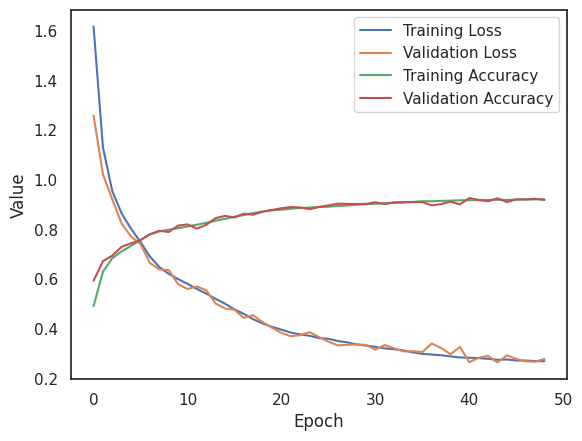

In [ ]:
from keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

### evaluate trained model

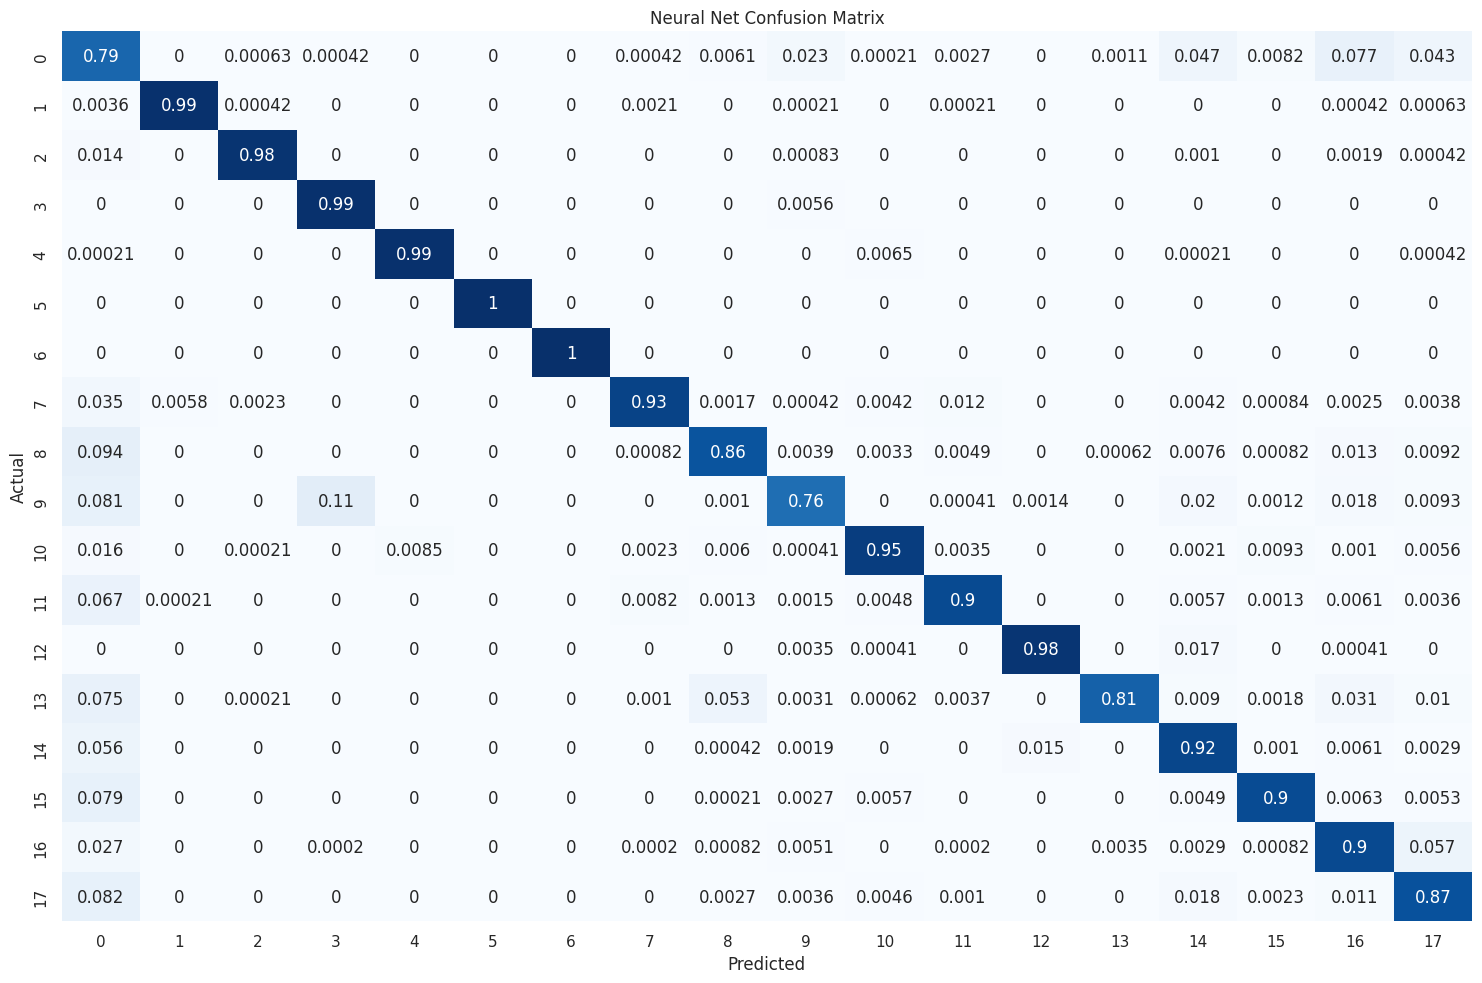

Neural Net accuracy_score: 0.9179050925925926


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Creating a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 10))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()


y_pred = enc.inverse_transform(model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)

# Plot the confusion matrix and print the accuracy score
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))


In [ ]:
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))

Neural Net accuracy_score: 0.9179050925925926


### Realtime Fault Prediction

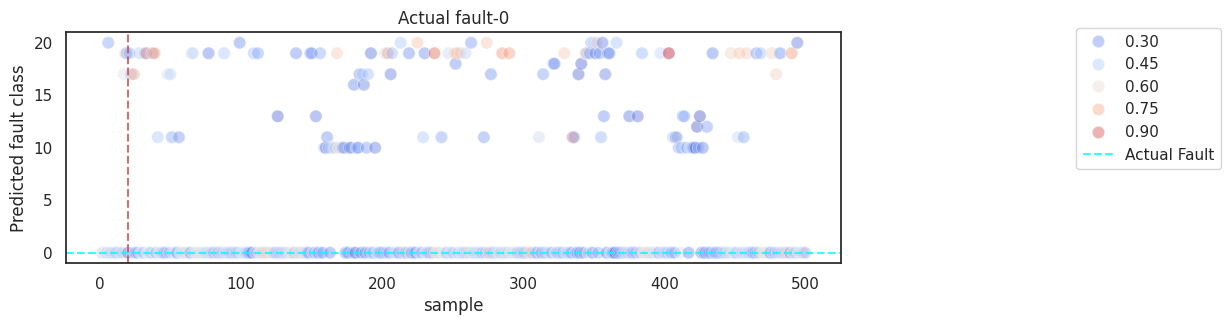

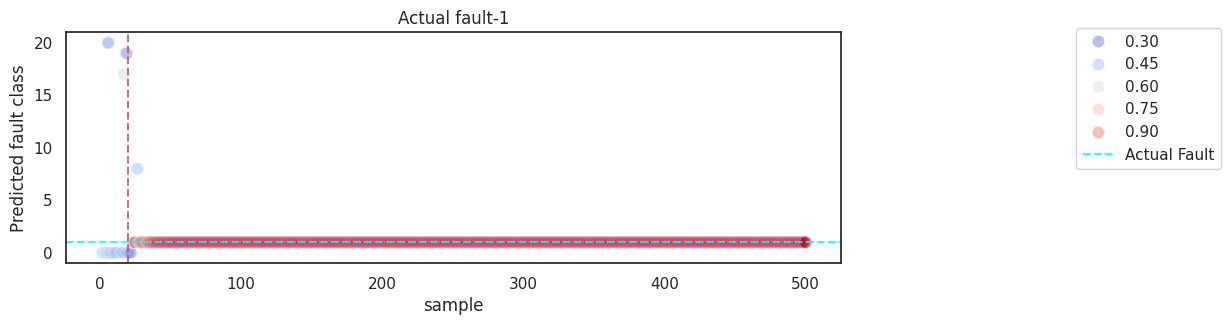

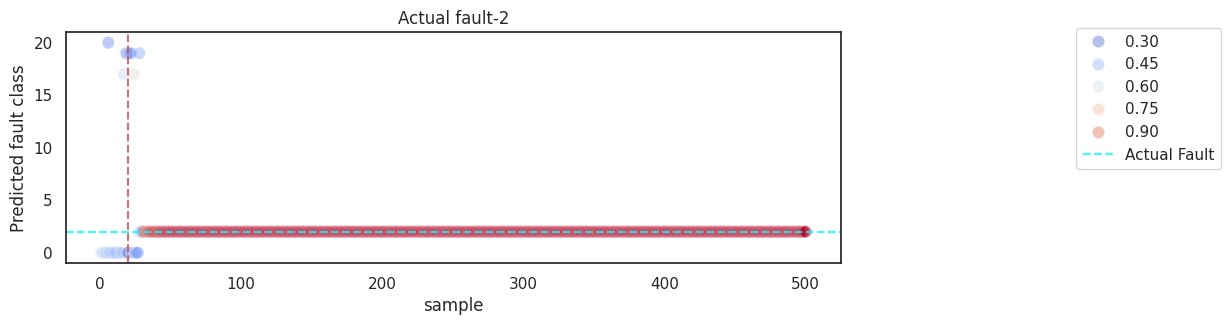

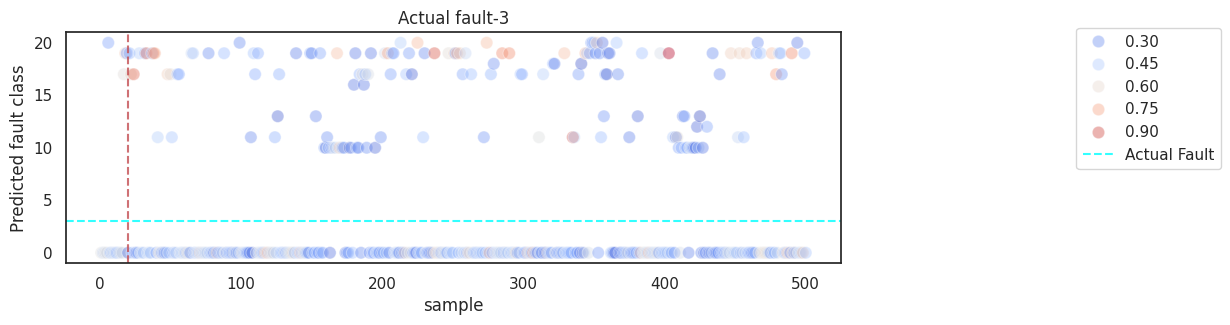

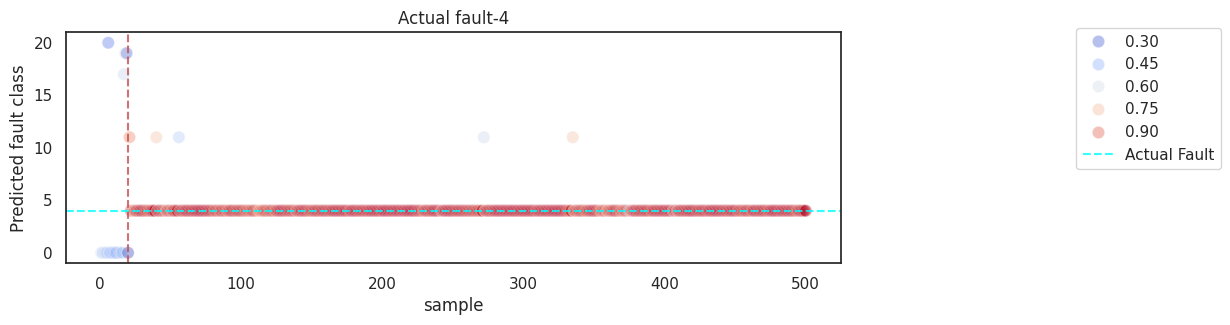

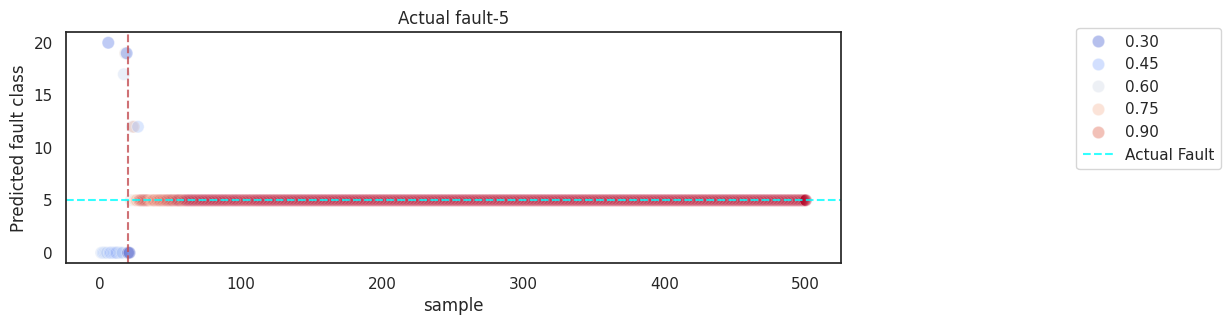

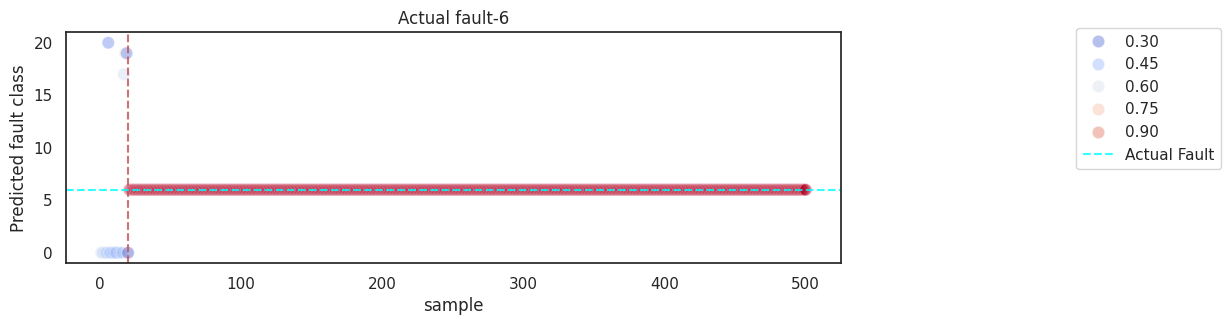

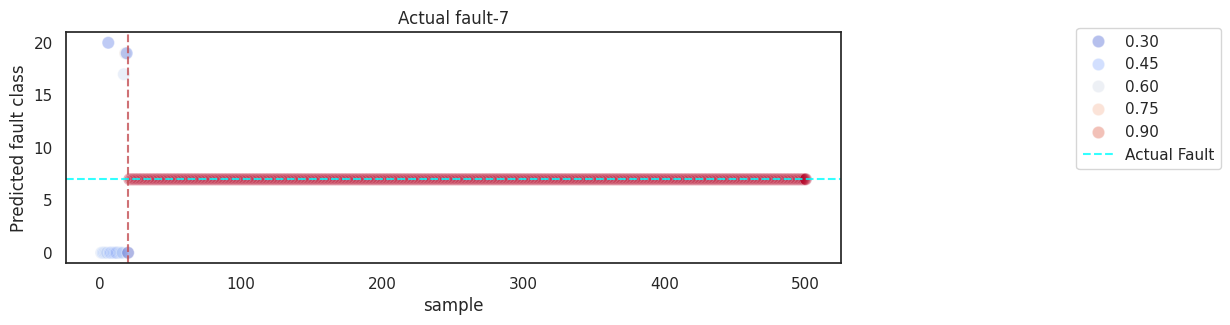

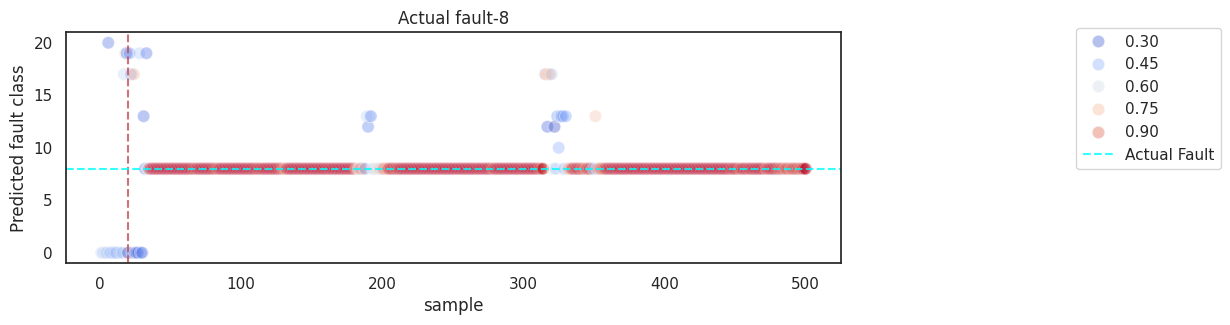

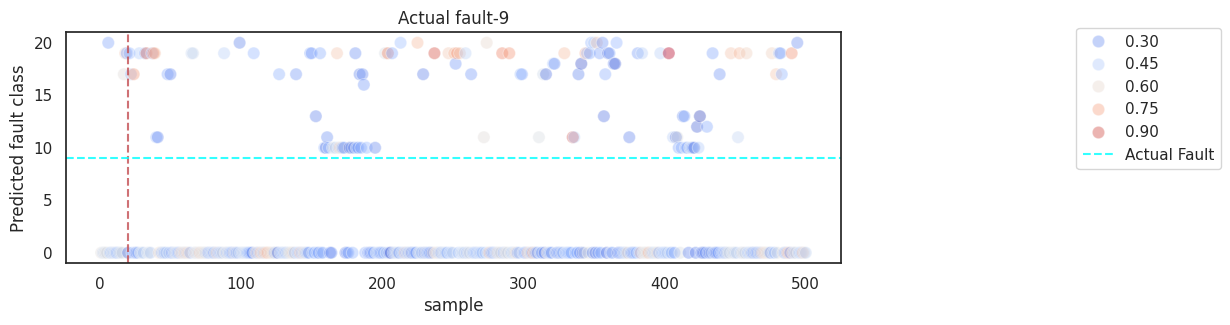

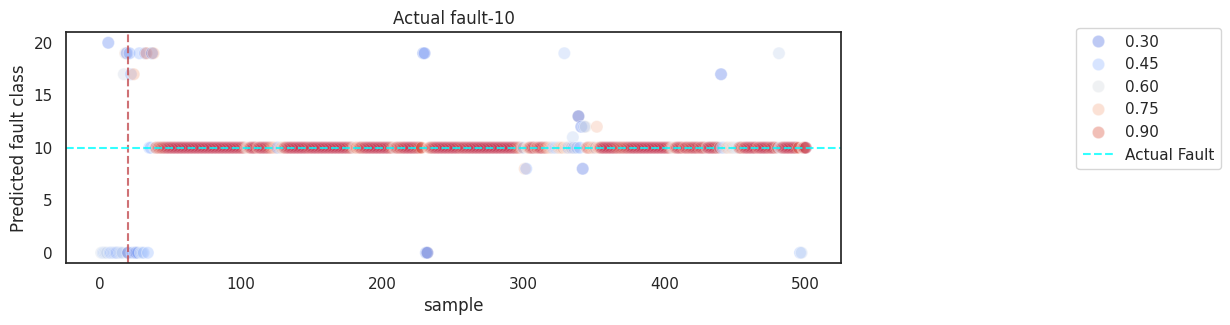

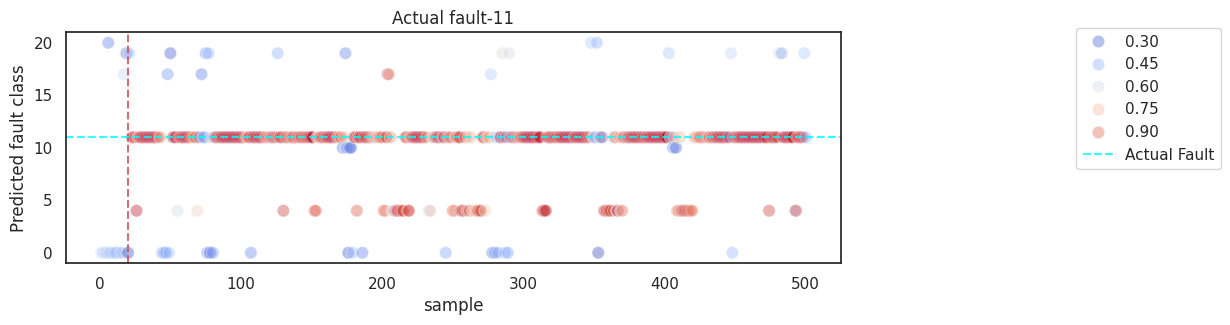

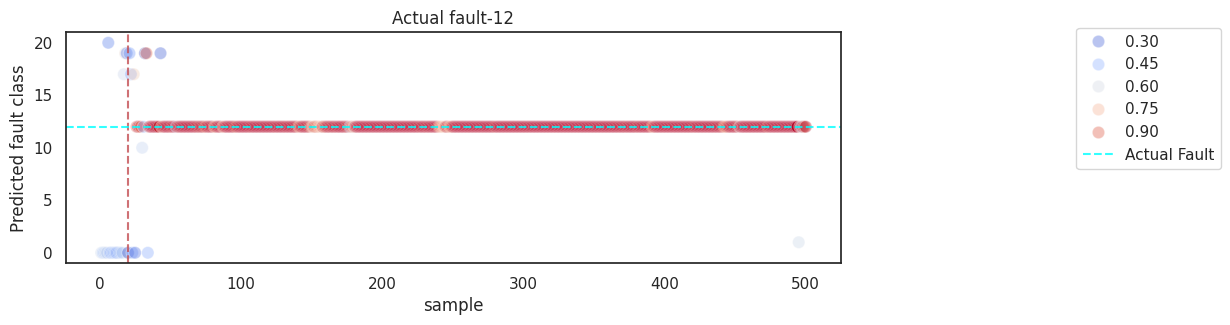

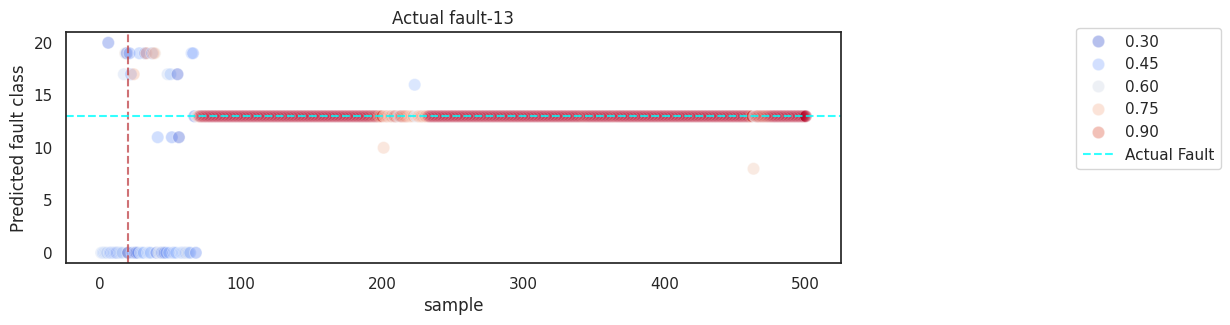

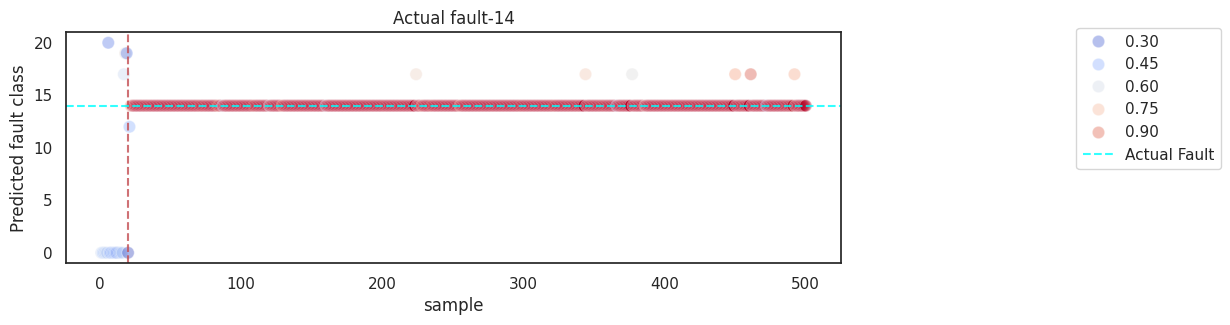

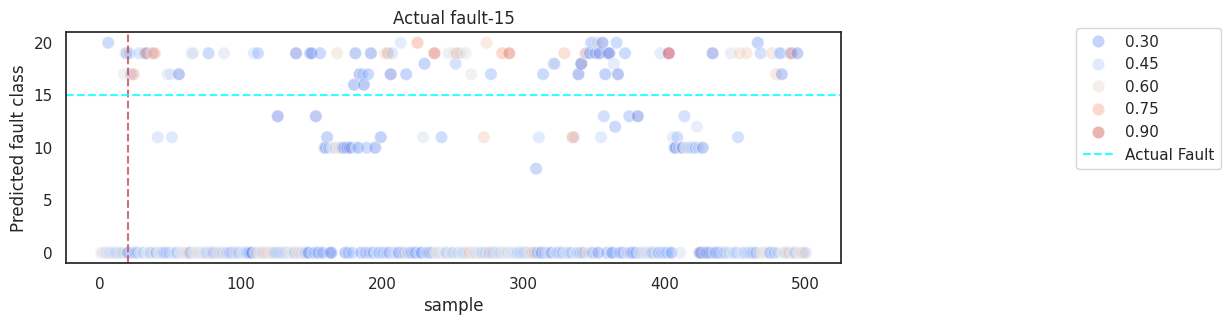

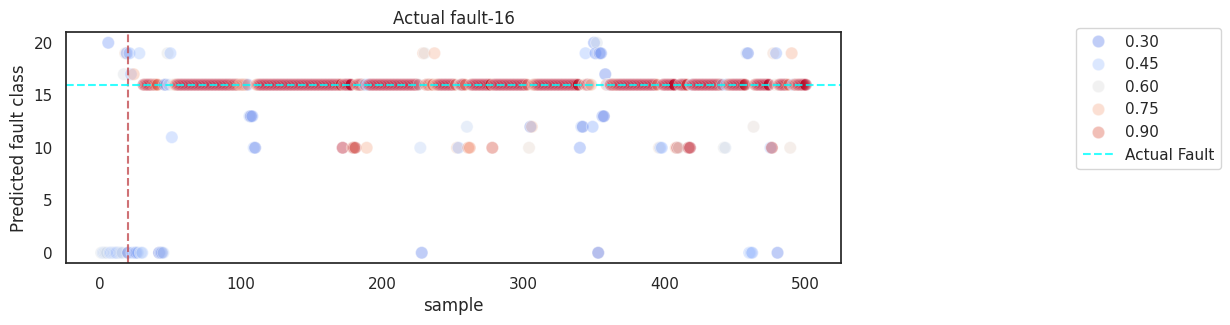

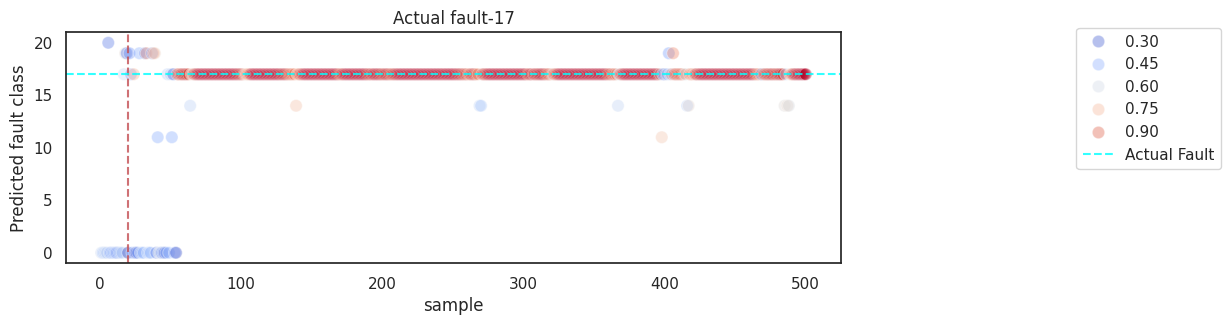

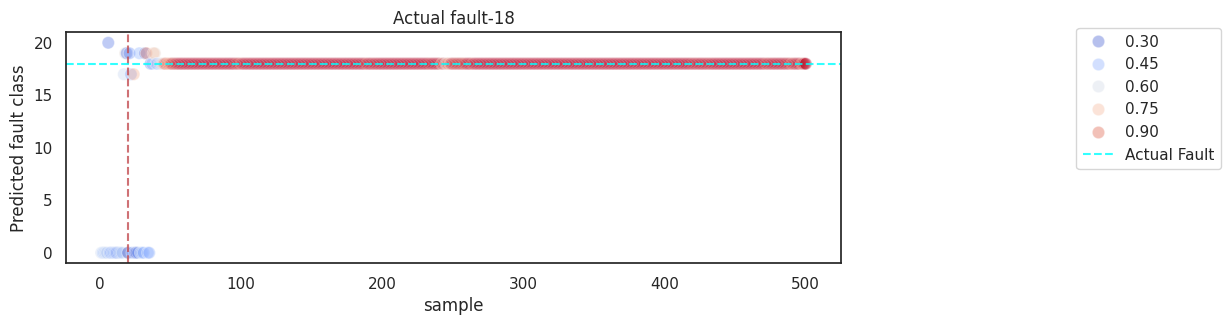

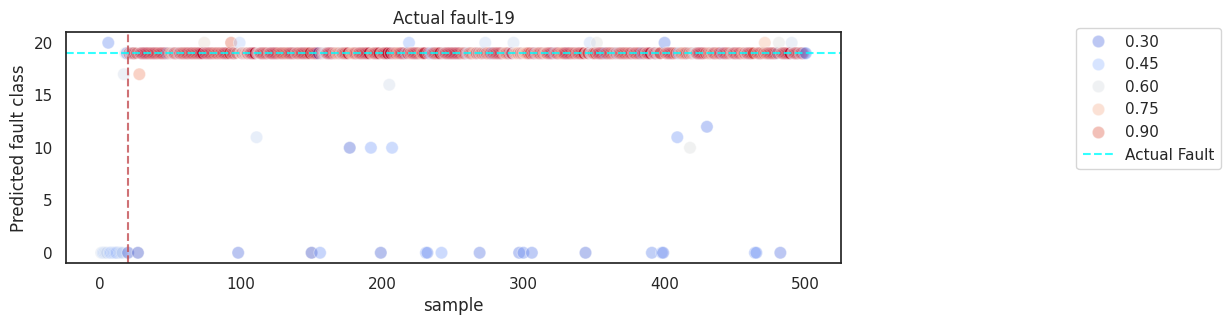

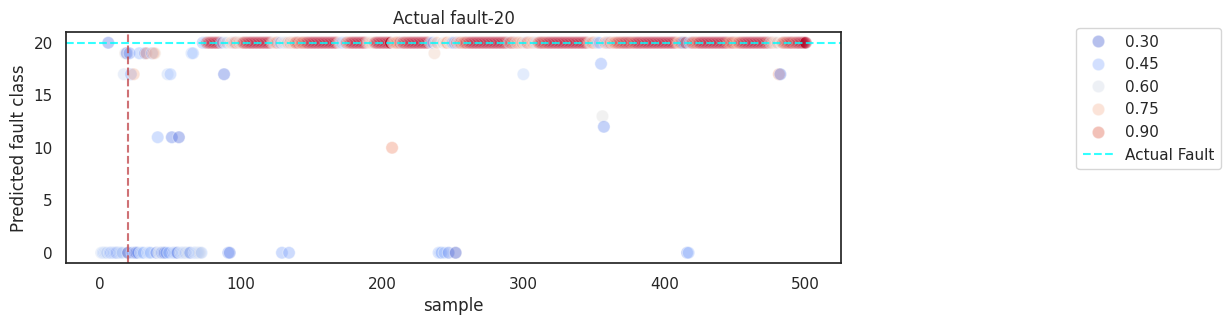

In [ ]:
for F_num in range(0,21):
    df_new= df[(df['faultNumber']==F_num) & (df['simulationRun']==2)].drop(columns = to_drop,axis=1)
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)

    y_pred = enc.inverse_transform(model.predict(x_new, verbose=0))
    y_proba = np.max(model.predict(x_new, verbose=0),axis=1)

    f, ax = plt.subplots(figsize=(10,3))

    sns.scatterplot(x=df_new['sample'],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4)

    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()

## obtain single accuracy score matrice

In [ ]:
Accuracy=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

  temp_df= df[(df['faultNumber']==Fnum) & (df['sample']>20) & (df['simulationRun']==np.random.randint(1,500))]
  x_faulty = sc.transform(temp_df.iloc[:,3:].drop(columns=to_drop,axis=1))
  y_true = temp_df['faultNumber']

  # Calculate y_pred within the loop to ensure shape consistency
  y_pred = enc.inverse_transform(model.predict(x_faulty, verbose=0)) # Calculate y_pred for current Fnum

  acc = accuracy_score(y_true, y_pred)
  print(f'Accuracy for fault {Fnum}: {acc}')
  Accuracy.append(acc)
print('#'*20)
print(f'the overall accuracy is {np.mean(Accuracy)}')

Accuracy for fault 0: 0.7895833333333333
Accuracy for fault 1: 0.9875
Accuracy for fault 2: 0.9854166666666667
Accuracy for fault 4: 0.99375
Accuracy for fault 5: 0.9958333333333333
Accuracy for fault 6: 1.0
Accuracy for fault 7: 1.0
Accuracy for fault 8: 0.9166666666666666
Accuracy for fault 10: 0.775
Accuracy for fault 11: 0.7625
Accuracy for fault 12: 0.975
Accuracy for fault 13: 0.425
Accuracy for fault 14: 0.9791666666666666
Accuracy for fault 16: 0.8395833333333333
Accuracy for fault 17: 0.9208333333333333
Accuracy for fault 18: 0.8166666666666667
Accuracy for fault 19: 0.8895833333333333
Accuracy for fault 20: 0.8979166666666667
####################
the overall accuracy is 0.8861111111111111


### t-sne visualization

In [ ]:
print("Original x_train shape:", x_train.shape)
x_subset = x_train[::50]
print("Subset x_train shape:", x_subset.shape)

Original x_train shape: (345600, 40)
Subset x_train shape: (6912, 40)


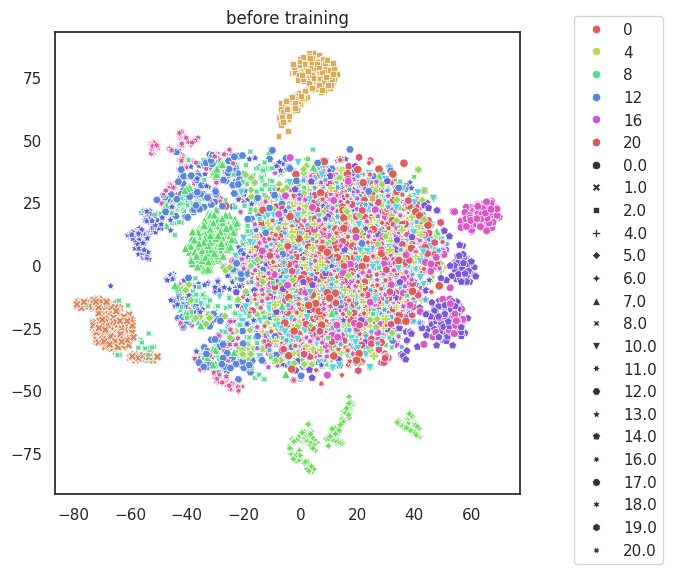

In [ ]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_train[::50,:])
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="hls")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('before training')
plt.show()

In [ ]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=model.input,outputs=model.layers[-2].output)
intermediate_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,200 (55.47 KB)

 Trainable params: 14,200 (55.47 KB)

 Non-trainable params: 0 (0.00 B)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


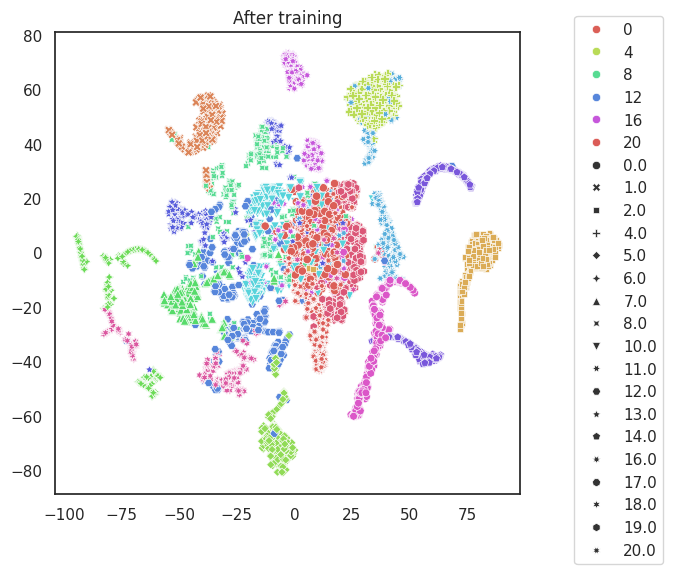

In [ ]:
x_inter = intermediate_model.predict(x_train[::50,:])

x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_inter)
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

# Create a scatter plot of the embedded data, colored by the true labels
f, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,style=y_label,palette="hls")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()

In [ ]:
from sklearn.metrics import f1_score,precision_score, recall_score

y_pred = enc.inverse_transform(model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
# Calculate precision and recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(" NN Net Precision:", precision)
print(" NN Net Recall:", recall)
print(" NN Net F1-score:", f1)

 NN Net Precision: 0.9289051961993371
 NN Net Recall: 0.9179050925925926
 NN Net F1-score: 0.9207449554822973
